In [30]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..")))
import pandas as pd
from scripts.sentiment_analysis import SentimentAnalysis
from scripts.thematic_analysis import ThematicAnalysis

from langdetect import detect

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
df_dashen = pd.read_csv('../data/Dashen_cleaned.csv')
df_boa = pd.read_csv('../data/BOA_cleaned.csv')
df_cbe = pd.read_csv('../data/CBE_cleaned.csv')
df = pd.concat([df_dashen,df_boa,df_cbe])

print(df.shape)
df.describe(include = 'object')

(2449, 5)


,review_text,date,bank_name,source
count,2449,2449,2449,2449
unique,1924,428,3,1
top,Good,2025-04-21,BOA,Google Play
freq,101,112,1000,2449


### Sentiment Analysis

In [32]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'error'
# Add a column with detected language
df['language'] = df['review_text'].apply(detect_language)

# Count how many are English
dashen_english_count = ((df['language'] == 'en') & (df['bank_name'] == 'Dashen Bank')).sum()
cbe_english_count = ((df['language'] == 'en') & (df['bank_name'] == 'CBE')).sum()
boa_english_count = ((df['language'] == 'en') & (df['bank_name'] == 'BOA')).sum()


In [33]:
total_reviews = len(df)
print(f'Total: {total_reviews}')
print(f'Dashen English count: {dashen_english_count}, CBE English count:{cbe_english_count} , BOA English count:{boa_english_count}')


Total: 2449
Dashen English count: 320, CBE English count:536 , BOA English count:630


In [34]:
df.head(10)

,review_text,rating,date,bank_name,source,language
0,I like this mobile banking app very much. Over...,2,2025-06-07,Dashen Bank,Google Play,en
1,love,3,2025-06-06,Dashen Bank,Google Play,sl
2,መቸሸጠ,5,2025-06-03,Dashen Bank,Google Play,error
3,wow,5,2025-06-03,Dashen Bank,Google Play,pl
4,gadaa,5,2025-06-01,Dashen Bank,Google Play,so
5,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play,en
6,good,4,2025-05-31,Dashen Bank,Google Play,so
7,very good for this app,5,2025-05-31,Dashen Bank,Google Play,en
8,top,5,2025-05-31,Dashen Bank,Google Play,en
9,this app better than Amole . but the biometric...,4,2025-05-31,Dashen Bank,Google Play,en


In [35]:
sa = SentimentAnalysis(df)
sa.remove_amharic_rows()
sa.emoji_to_text()
sa.sentiment_analysis_distilbert()

Device set to use cuda:0
c:\Users\hanna\OneDrive\Desktop\KAIMS\customer_experience_analytics_for_fintech\scripts\sentiment_analysis.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['review_clean'] = self.df['review_text'].apply(convert_emoji_to_text)
100%|██████████| 1486/1486 [00:13<00:00, 110.31it/s]
c:\Users\hanna\OneDrive\Desktop\KAIMS\customer_experience_analytics_for_fintech\scripts\sentiment_analysis.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[['sentiment_label', 'sentime

In [36]:
sa.df.head()

,review_text,rating,date,bank_name,source,language,review_clean,sentiment_label,sentiment_score,sentiment_value,scaled_sentiment
0,I like this mobile banking app very much. Over...,2,2025-06-07,Dashen Bank,Google Play,en,I like this mobile banking app very much. Over...,NEGATIVE,0.990445,-1,-0.990445
5,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play,en,Massive upgrade from the Amole app.,POSITIVE,0.964642,1,0.964642
7,very good for this app,5,2025-05-31,Dashen Bank,Google Play,en,very good for this app,POSITIVE,0.999814,1,0.999814
8,top,5,2025-05-31,Dashen Bank,Google Play,en,top,POSITIVE,0.999707,1,0.999707
9,this app better than Amole . but the biometric...,4,2025-05-31,Dashen Bank,Google Play,en,this app better than Amole . but the biometric...,NEGATIVE,0.999608,-1,-0.999608


In [37]:
sa.sentiment_analysis_text_blob()

c:\Users\hanna\OneDrive\Desktop\KAIMS\customer_experience_analytics_for_fintech\scripts\sentiment_analysis.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['sentiment'] = self.df['review_text'].apply(get_sentiment)


In [38]:
sa.df.head(10)

,review_text,rating,date,bank_name,source,language,review_clean,sentiment_label,sentiment_score,sentiment_value,scaled_sentiment,sentiment
0,I like this mobile banking app very much. Over...,2,2025-06-07,Dashen Bank,Google Play,en,I like this mobile banking app very much. Over...,NEGATIVE,0.990445,-1,-0.990445,0.333333
5,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play,en,Massive upgrade from the Amole app.,POSITIVE,0.964642,1,0.964642,0.000000
7,very good for this app,5,2025-05-31,Dashen Bank,Google Play,en,very good for this app,POSITIVE,0.999814,1,0.999814,0.910000
8,top,5,2025-05-31,Dashen Bank,Google Play,en,top,POSITIVE,0.999707,1,0.999707,0.500000
9,this app better than Amole . but the biometric...,4,2025-05-31,Dashen Bank,Google Play,en,this app better than Amole . but the biometric...,NEGATIVE,0.999608,-1,-0.999608,0.318182
12,wow to it saff and this app,5,2025-05-30,Dashen Bank,Google Play,en,wow to it saff and this app,POSITIVE,0.998571,1,0.998571,0.100000
13,it too slow,3,2025-05-29,Dashen Bank,Google Play,en,it too slow,NEGATIVE,0.999680,-1,-0.999680,-0.300000
15,real life changer,5,2025-05-28,Dashen Bank,Google Play,en,real life changer,POSITIVE,0.999779,1,0.999779,0.200000
21,useless app ever loading take long,1,2025-05-27,Dashen Bank,Google Play,en,useless app ever loading take long,NEGATIVE,0.999735,-1,-0.999735,-0.275000
22,Game changer app! Dashen Bank Super App is fas...,5,2025-05-26,Dashen Bank,Google Play,en,Game changer app! Dashen Bank Super App is fas...,POSITIVE,0.999617,1,0.999617,0.297436


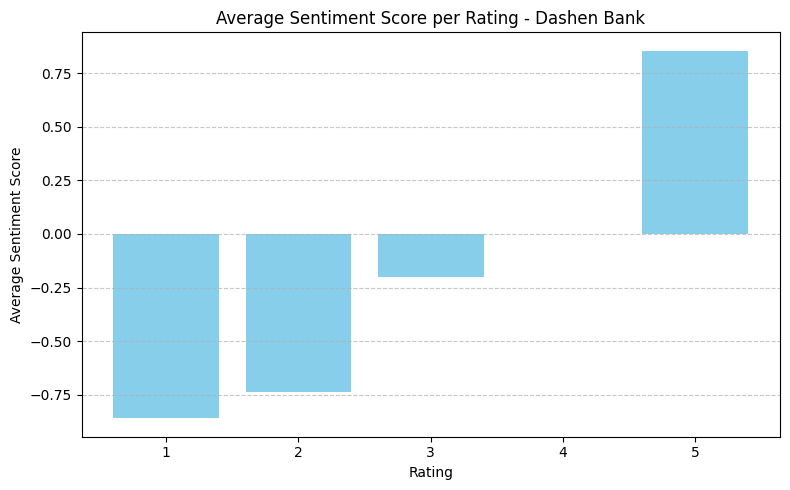

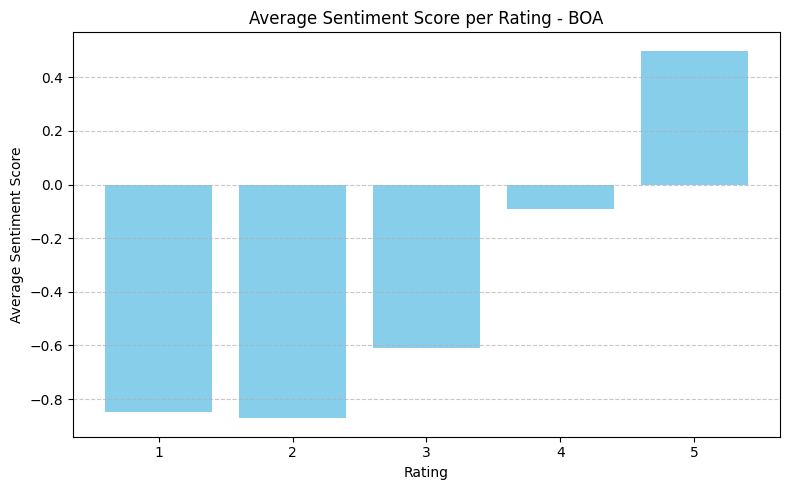

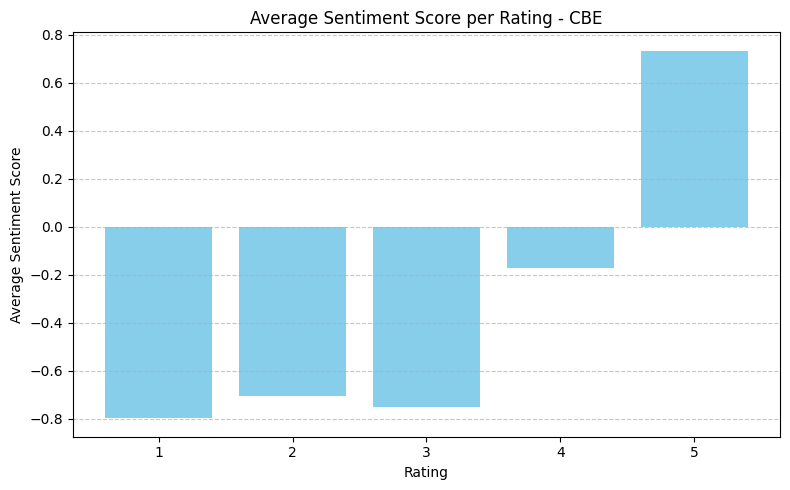

In [39]:
sa.plot_sentiment_by_rating()

### Thematic  Analysis

In [40]:
ta = ThematicAnalysis(sa.df)

- Thematic analysis pipeline

In [41]:
ta.apply_preprocessing()
ta.apply_keyword_extraction()
ta.apply_theme_assignment()
ta.save_as_csv()
ta.df.head()

<string>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\hanna\OneDrive\Desktop\KAIMS\customer_experience_analytics_for_fintech\scripts\thematic_analysis.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df["keywords"] = self.df["review_text"].apply(self.extract_keywords)
c:\Users\hanna\OneDrive\Desktop\KAIMS\customer_experience_analytics_for_fintech\scripts\thematic_analysis.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,review_text,rating,date,bank_name,source,language,review_clean,sentiment_label,sentiment_score,sentiment_value,scaled_sentiment,sentiment,tokens,keywords,themes
0,I like this mobile banking app very much. Over...,2,2025-06-07,Dashen Bank,Google Play,en,I like this mobile banking app very much. Over...,NEGATIVE,0.990445,-1,-0.990445,0.333333,"[like, mobile, banking, app, overall, user, in...","[it, instant response, overall user interface,...","[User Interface & Experience, General Satisfac..."
5,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play,en,Massive upgrade from the Amole app.,POSITIVE,0.964642,1,0.964642,0.000000,"[massive, upgrade, amole, app]","[the amole app, massive upgrade]",[Uncategorized]
7,very good for this app,5,2025-05-31,Dashen Bank,Google Play,en,very good for this app,POSITIVE,0.999814,1,0.999814,0.910000,"[good, app]",[this app],[General Satisfaction]
8,top,5,2025-05-31,Dashen Bank,Google Play,en,top,POSITIVE,0.999707,1,0.999707,0.500000,[],[],[Uncategorized]
9,this app better than Amole . but the biometric...,4,2025-05-31,Dashen Bank,Google Play,en,this app better than Amole . but the biometric...,NEGATIVE,0.999608,-1,-0.999608,0.318182,"[app, well, amole, biometric, new, update, work]","[amole, new update]",[Feature Requests]


<string>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<string>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<string>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



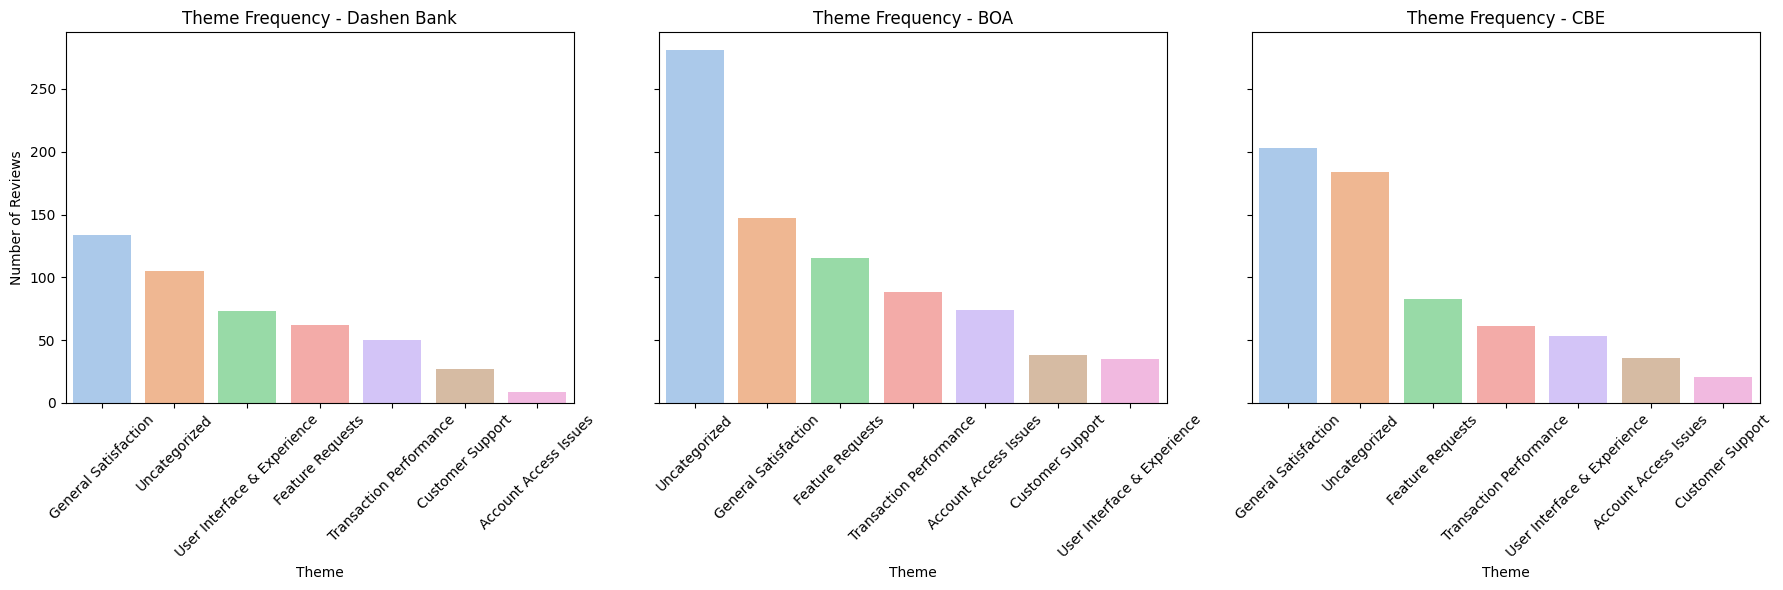

In [42]:
ta.plot_themes_frequency_per_bank()

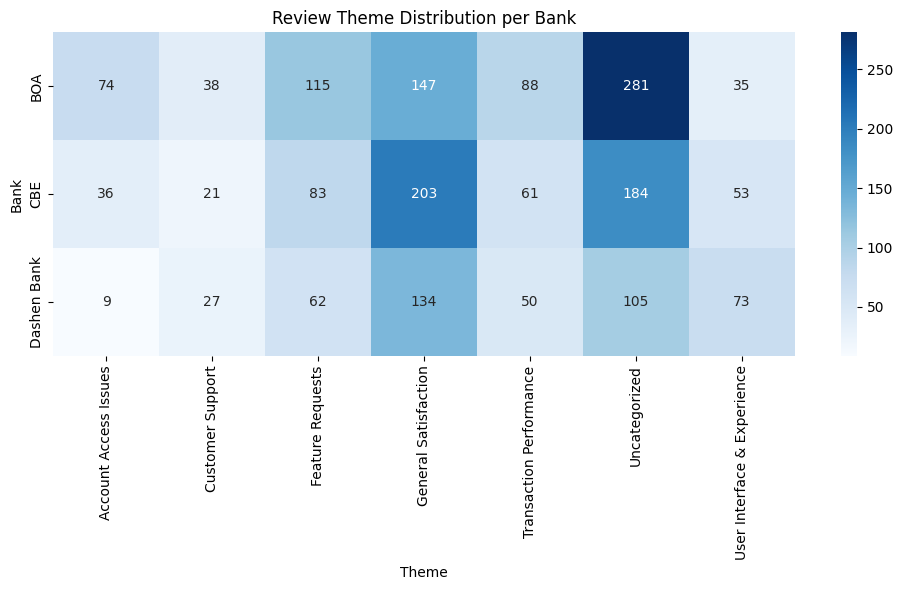

In [43]:
ta.plot_heatmap()

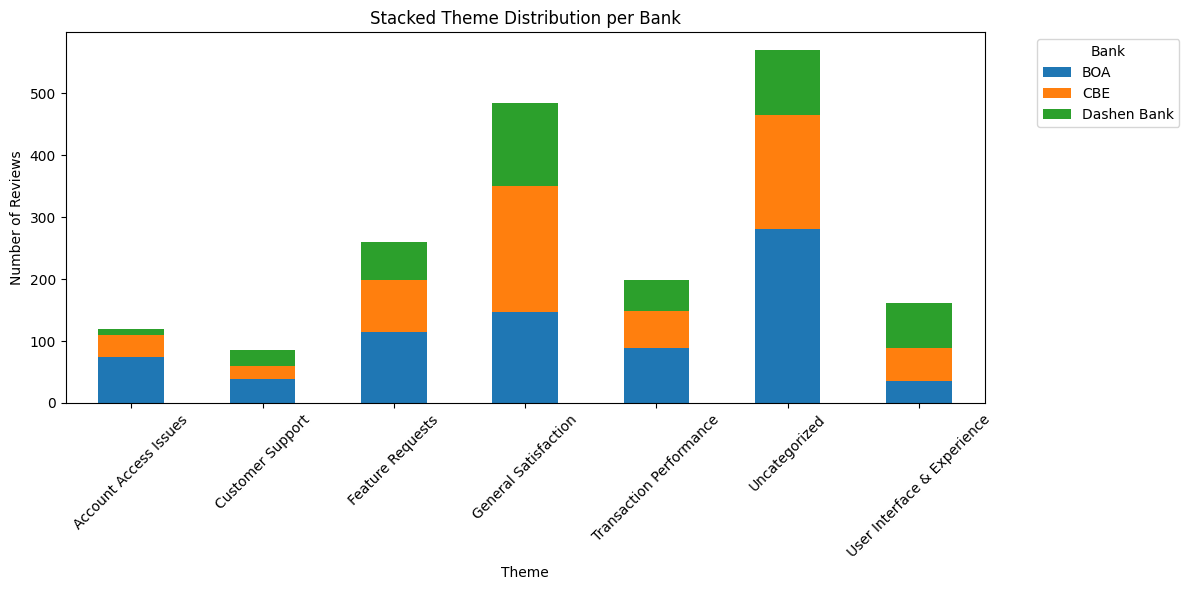

In [44]:
ta.plot_stacked_chart()

In [45]:
ta.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1486 entries, 0 to 998
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_text       1486 non-null   object 
 1   rating            1486 non-null   int64  
 2   date              1486 non-null   object 
 3   bank_name         1486 non-null   object 
 4   source            1486 non-null   object 
 5   language          1486 non-null   object 
 6   review_clean      1486 non-null   object 
 7   sentiment_label   1486 non-null   object 
 8   sentiment_score   1486 non-null   float64
 9   sentiment_value   1486 non-null   int64  
 10  scaled_sentiment  1486 non-null   float64
 11  sentiment         1486 non-null   float64
 12  tokens            1486 non-null   object 
 13  keywords          1486 non-null   object 
 14  themes            1486 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 185.8+ KB


- Manually inspecting the uncategorized reviews



In [46]:
uncategorized_reviews = ta.df[ta.df['themes'].apply(lambda x: x == ["Uncategorized"])]
uncategorized_reviews.head(20)

,review_text,rating,date,bank_name,source,language,review_clean,sentiment_label,sentiment_score,sentiment_value,scaled_sentiment,sentiment,tokens,keywords,themes
5,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play,en,Massive upgrade from the Amole app.,POSITIVE,0.964642,1,0.964642,0.000000,"[massive, upgrade, amole, app]","[the amole app, massive upgrade]",[Uncategorized]
8,top,5,2025-05-31,Dashen Bank,Google Play,en,top,POSITIVE,0.999707,1,0.999707,0.500000,[],[],[Uncategorized]
12,wow to it saff and this app,5,2025-05-30,Dashen Bank,Google Play,en,wow to it saff and this app,POSITIVE,0.998571,1,0.998571,0.100000,"[wow, saff, app]","[it, this app]",[Uncategorized]
15,real life changer,5,2025-05-28,Dashen Bank,Google Play,en,real life changer,POSITIVE,0.999779,1,0.999779,0.200000,"[real, life, changer]",[real life changer],[Uncategorized]
23,very useful App,1,2025-05-26,Dashen Bank,Google Play,en,very useful App,POSITIVE,0.999579,1,0.999579,0.390000,"[useful, app]",[very useful app],[Uncategorized]
37,dashen bank or dashen super app?,1,2025-05-17,Dashen Bank,Google Play,en,dashen bank or dashen super app?,NEGATIVE,0.993753,-1,-0.993753,0.333333,"[dashen, bank, dashen, super, app]","[dashen bank, dashen super app]",[Uncategorized]
45,its my choice,5,2025-05-15,Dashen Bank,Google Play,en,its my choice,POSITIVE,0.996201,1,0.996201,0.000000,[choice],[its my choice],[Uncategorized]
54,what a helpful app!!!!,5,2025-05-13,Dashen Bank,Google Play,en,what a helpful app!!!!,POSITIVE,0.999090,1,0.999090,0.000000,"[helpful, app]",[],[Uncategorized]
60,"A must have, seamless, all in one digital plat...",5,2025-05-12,Dashen Bank,Google Play,en,"A must have, seamless, all in one digital plat...",POSITIVE,0.996646,1,0.996646,0.050000,"[seamless, digital, platform, db, superapp, li...","[one digital platform, always one step, db sup...",[Uncategorized]
67,I am highly excited by using this application ...,5,2025-05-03,Dashen Bank,Google Play,en,I am highly excited by using this application ...,POSITIVE,0.999518,1,0.999518,0.437500,"[highly, excited, application, favorable, pref...","[this application, it, i]",[Uncategorized]
